In [41]:
import xgboost

In [42]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# split data to X and Y
X = dataset[:, 0:8]  # 特征
Y = dataset[:, 8]  # label

# split data to train and test
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

# fit model
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

# make prediction from test data
y_pred = model.predict(X_test,)
predictions = [round(value) for value in y_pred]

# evaluate the prediction
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100))

[15:53:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 74.02%


In [43]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# split data to X and Y
X = dataset[:, 0:8]  # 特征
Y = dataset[:, 8]  # label

# split data to train and test
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

# fit model
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make prediction from test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate the prediction
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100))

[0]	validation_0-logloss:0.60491
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50935
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54546
[15]	validation_0-logloss:0.54613
Accuracy: 74.41%


[15:53:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


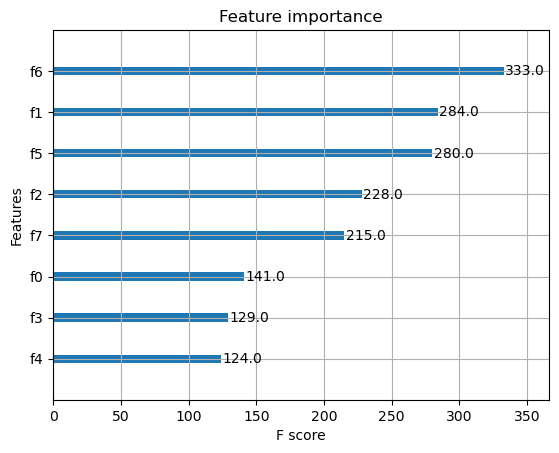

In [44]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# split data to X and Y
X = dataset[:, 0:8]  # 特征
y = dataset[:, 8]  # label

# fit model without training data
model = XGBClassifier(use_label_encoder=False)
model.fit(X, y)

# plot feature importance
plot_importance(model)
pyplot.show()


## 参数
* learning rate
* tree
    * max_depth
    * min_child_weight
    * subsample, colsample_bytree
    * gamma
* 正则化参数
    * lambda
    * alpha

In [45]:
# Tune learning rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# split data to X and Y
X = dataset[:, 0:8]  # 特征
y = dataset[:, 8]  # label

# grid search
model = XGBClassifier(use_label_encoder=False)
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate= learning_rate)

# k折交叉验证 （KFold & StratifiedKFold）
# KFold： n_splits(将数据划分为多少份), shuffle(是否需要打乱顺序), random_state(表示随机数的种子， 只有当shuffle设置为True的时候才会生效)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# GridSearchCV：网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss',n_jobs=-1, cv=kfold)
grid_result= grid_search.fit(X,y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means, params):
    print("%f with %r" % (mean, param))


/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

[15:54:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.530152 using {'learning_rate': 0.01}
-0.689563 with {'learning_rate': 0.0001}
-0.660868 with {'learning_rate': 0.001}
-0.530152 with {'learning_rate': 0.01}
-0.552723 with {'learning_rate': 0.1}
-0.653341 with {'learning_rate': 0.2}
-0.718789 with {'learning_rate': 0.3}
